# Laboratorio 09 Matrices

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

## Punto 1: **Modelo de encriptación**


Un proceso para encriptar un mensaje secreto es usar cierta matriz cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc. y espacio=27, se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamaño de la matriz de código, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje.

La persona que debe recibir el mensaje conoce la matriz de código. El o ella arreglan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el número de elementos en una fila conicide con el tamaño de la matriz de código multiplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

```
47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588,
```


la primera fila del mensaje es `47,49,-19,257,487`

*¿Cual es el mensaje?*

In [1]:
import numpy as np

# Matriz de código A
A = np.array([[1, 2, -3, 4, 5],
              [-2, -5, 8, -8, -9],
              [1, 2, -2, 7, 9],
              [1, 1, 0, 6, 12],
              [2, 4, -6, 8, 11]])

# Mensaje encriptado
mensaje_cifrado = np.array([[47, 49, -19, 257, 487],
                            [10, -9, 63, 137, 236],
                            [79, 142, -184, 372, 536],
                            [59, 70, -40, 332, 588]])

# Dimensión de la matriz
n = A.shape[0]  # Número de filas de la matriz A

# Verificar si la matriz es invertible
try:
    A_inv = np.linalg.inv(A)  # Calculamos la inversa de A
except np.linalg.LinAlgError:
    print("La matriz A no es invertible.")
    exit()

# Reorganizar el mensaje cifrado en filas
mensaje_cifrado = mensaje_cifrado.reshape(-1, n)  # Cada fila tiene n elementos

# Función para convertir números a letras
def numero_a_letra(n):
    if 1 <= n <= 26:
        return chr(n + 64)  # Convierte 1=A, 2=B, ..., 26=Z
    elif n == 27:
        return " "  # Espacio
    return "?"  # Para caracteres fuera de rango

# Decodificar mensaje fila por fila
mensaje_texto = []
for fila in mensaje_cifrado:
    fila_decodificada = np.dot(fila, A_inv)  # Aplicar la inversa de A
    fila_decodificada = np.round(fila_decodificada).astype(int)  # Redondear y convertir a enteros
    print("Fila decodificada:", fila_decodificada)  # Ver valores antes de convertir a texto

    # Convertir la fila en texto
    texto_fila = "".join(numero_a_letra(n) for n in fila_decodificada)
    mensaje_texto.append(texto_fila)

# Unir todas las filas decodificadas en un solo mensaje
mensaje_final = "\n".join(mensaje_texto)

print("\nMensaje decodificado:\n", mensaje_final)


Fila decodificada: [ 1 18  5 27 25]
Fila decodificada: [15 21 27  8  1]
Fila decodificada: [22  9 14  7 27]
Fila decodificada: [ 6 21 14 27 27]

Mensaje decodificado:
 ARE Y
OU HA
VING 
FUN  


In [2]:
import numpy as np

# Matriz de código A
A = np.array([[1, 2, -3, 4, 5],
              [-2, -5, 8, -8, -9],
              [1, 2, -2, 7, 9],
              [1, 1, 0, 6, 12],
              [2, 4, -6, 8, 11]])

# Mensaje encriptado
mensaje_cifrado = np.array([[47, 49, -19, 257, 487],
                            [10, -9, 63, 137, 236],
                            [79, 142, -184, 372, 536],
                            [59, 70, -40, 332, 588]])

# Dimensiones de la matriz
n = A.shape[0]  # Número de filas/columnas de A

# Convertimos el mensaje en una matriz de tamaño adecuado
#mensaje_cifrado = mensaje_cifrado.reshape(-1, n).T  # Organizar en columnas

# Calculamos la inversa de la matriz de código
A_inv = np.linalg.inv(A)

# Decodificamos el mensaje
mensaje_decodificado = np.dot(mensaje_cifrado, A_inv).round().astype(int)

# Convertimos a caracteres
def numero_a_letra(n):
    if 1 <= n <= 26:
        return chr(n + 64)  # Convierte 1=A, 2=B, ..., 26=Z
    elif n == 27:
        return " "  # Espacio
    return "?"  # Para caracteres no válidos

mensaje_texto = "".join(numero_a_letra(n) for n in mensaje_decodificado.flatten())

print("Mensaje decodificado:", mensaje_texto)


Mensaje decodificado: ARE YOU HAVING FUN  


## Punto 2: **Operaciones matricial con regresión lineal.**

Cuando se desea hacer una regresión lineal multivariada, existen diferentes formas de realizar la regresión, una de ellas es encontrar el error cuadrático medio y minimizar el conjunto de parámetros de la regresión emplando algún método de minimización; otra forma es encontrar la expresión analítica en forma matricial, para determinar el conjunto de parámetros de la regresión. En este último caso, la regresión lineal viene dada por la siguiente expresion generalizada:


$$\Theta = (X^T X)^{-1} X^T y$$

donte $\Theta$ es la matriz de parametros asociados a la regresión lineal, $X$ la matriz de características y $y$ los valos esperados, así, si tenemos una conjunto de datos en $N$ dimensiones; la recta, plano o hiperplano puede ser calculado como:

$$Y=\Theta^T X$$


En el caso de dos dimensiones, supongamos que $X$, e $Y$ presentan un comportamiento lineal, y vienen dados por (en este caso el super indice es):


- Sea $\vec{X}=x^{(1)}, x^{(2)}, x^{(3)}, x^{(4)}, ..., x^{(m)}$
- Sea $\vec{Y}=y^{(1)}, y^{(2)}, y^{(3)}, y^{(4)}, ..., y^{(m)}$

Para determinar la ecuación de la recta, hay que conocer los párametros $\theta_0 $, $\theta_1$, que cumplen que :   $y^{(i)} = \theta_1 x^{(i)} + \theta_0$ la anterior expresión puede ser escrita como:

\begin{equation}
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{bmatrix}=
\begin{bmatrix}
\theta_0 & \theta_1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
\end{bmatrix}
\end{equation}


Para determinar la matriz de theta entonces se puede aplicar la ecuación:

$$\Theta = (X^T X)^{-1} X^T y$$

donde:
\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{(1)} \\
1 & x_1^{(2)} \\
\vdots & \vdots \\
1 & x_1^{(m)}
\end{bmatrix}
\end{equation}

y


\begin{equation}
y=
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots\\
y^{(m)}
\end{bmatrix}
\end{equation}

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos:
```python
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
```



Generalice para el siguiente problema bidimensional:


```python
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
#scatter = ax.scatter(x1, x2, y,"-")
```

MI CODIGO AQUI

In [3]:
# Generalizacion de regresión lineal en dos dimensiones
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1 = 2 * np.random.random(N) - 1
noise2 = 2 * np.random.random(N) - 1
y = 2 * (x1 + noise1) - 3 * (x2 + noise2) + 0.0

# Construcción de la matriz X 2D
X = np.vstack((np.ones(N), x1, x2)).T
Y = y.reshape(-1, 1)
# Cálculo de Theta con pseudoinv
theta = np.linalg.pinv(X.T @ X) @ X.T @ Y
y_pred = X @ theta


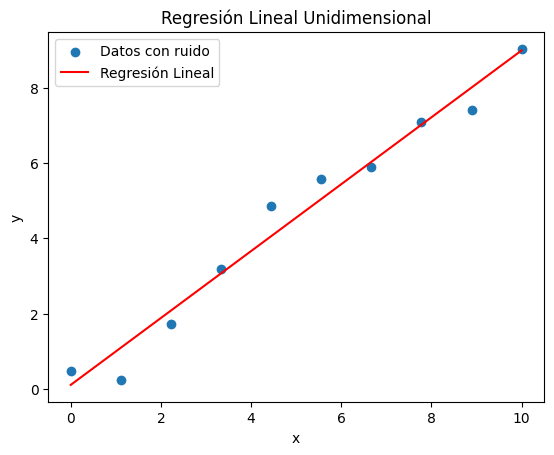

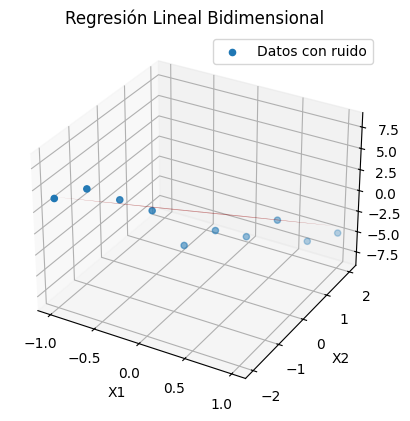

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Regresión lineal en una dimensión
N = 10
x1 = np.linspace(0, 10, N)
noise = 2 * np.random.random(N) - 1
y = 0.9 * x1 + noise
# Construcción de la matriz X
X = np.vstack((np.ones(N), x1)).T
Y = y.reshape(-1, 1)
# Cálculo de Theta con ec.matricial
theta = np.linalg.inv(X.T @ X) @ X.T @ Y
y_pred = X @ theta
#2D
plt.scatter(x1, y, label="Datos con ruido")
plt.plot(x1, y_pred, color="red", label="Regresión Lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regresión Lineal Unidimensional")
plt.show()




# Lo mismo de arriba pero para el bidimensional
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1 = 2 * np.random.random(N) - 1
noise2 = 2 * np.random.random(N) - 1
y = 2 * (x1 + noise1) - 3 * (x2 + noise2) + 0.0
X = np.vstack((np.ones(N), x1, x2)).T
Y = y.reshape(-1, 1)
theta = np.linalg.pinv(X.T @ X) @ X.T @ Y
y_pred = X @ theta

#3D grafica
X1, X2 = np.meshgrid(x1, x2)
Y_real = 2 * X1 - 3 * X2 + 0.0
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x1, x2, y, label="Datos con ruido")
ax.plot_surface(X1, X2, Y_real, alpha=0.5, color="red")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")

plt.title("Regresión Lineal Bidimensional")
plt.legend()
plt.show()


## Punto 3: **Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

a) Diagonalize $A$.

b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


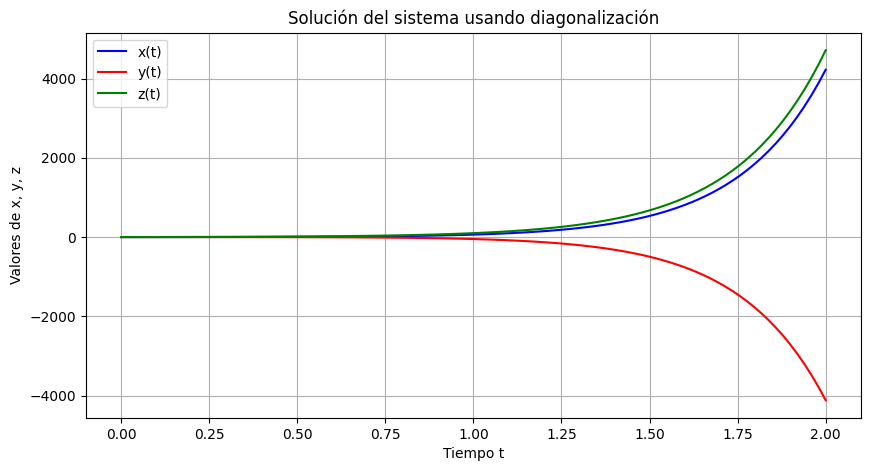

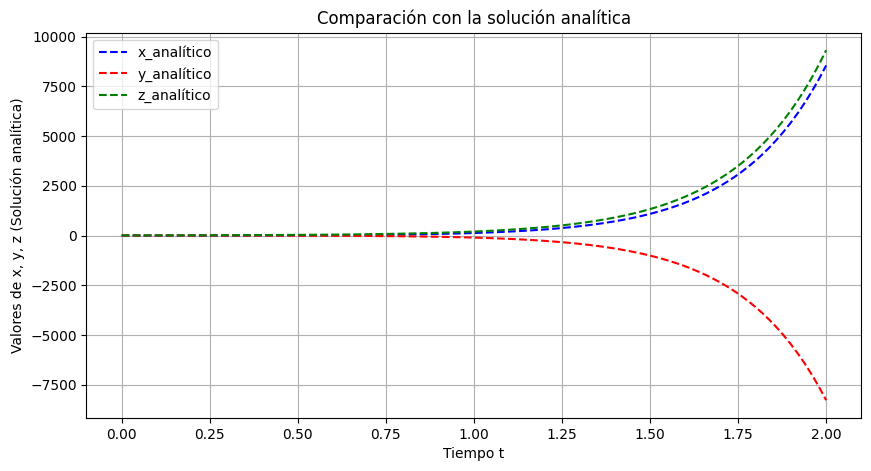

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Def A
A = np.array([[2, -1, 1],
              [0, 3, -1],
              [2, 1, 3]])

#C. inicial
r0 = np.array([1, 1, 2])

# a) Diag. A
eigvals, eigvecs = np.linalg.eig(A)  # Valores y vectores propios
D = np.diag(eigvals)  # Matriz diagonal
U = eigvecs  # Matriz vectores propios
U_inv = np.linalg.inv(U)  # Inversa de U

# b)
def solucion_diagonalizada(t):
    return U @ np.diag(np.exp(eigvals * t)) @ U_inv @ r0

#C)
t_vals = np.linspace(0, 2, 100)
soluciones = np.array([solucion_diagonalizada(t) for t in t_vals])

plt.figure(figsize=(10, 5))
plt.plot(t_vals, soluciones[:, 0], label="x(t)", color="b")
plt.plot(t_vals, soluciones[:, 1], label="y(t)", color="r")
plt.plot(t_vals, soluciones[:, 2], label="z(t)", color="g")
plt.xlabel("Tiempo t")
plt.ylabel("Valores de x, y, z")
plt.legend()
plt.title("Solución del sistema usando diagonalización")
plt.grid()
plt.show()

#d)comparacion
def solucion_analitica(t):
    x = r0[0] * (np.exp(2*t) * (1 + np.exp(2*t) - 2*t)) + r0[1] * (-2 * np.exp(2*t)) + r0[2] * (np.exp(2*t) * (-1 + np.exp(2*t)))
    y = r0[0] * (-np.exp(2*t) * (-1 + np.exp(2*t) - 2*t)) + r0[1] * ((2*t + 1) * np.exp(2*t)) + r0[2] * (-np.exp(2*t) * (-1 + np.exp(2*t)))
    z = r0[0] * (np.exp(2*t) * (-1 + np.exp(2*t) + 2*t)) + r0[1] * (2 * np.exp(2*t)) + r0[2] * (np.exp(2*t) * (1 + np.exp(2*t)))
    return np.array([x, y, z])

sol_analitica = np.array([solucion_analitica(t) for t in t_vals])

plt.figure(figsize=(10, 5))
plt.plot(t_vals, sol_analitica[:, 0], "--", label="x_analítico", color="b")
plt.plot(t_vals, sol_analitica[:, 1], "--", label="y_analítico", color="r")
plt.plot(t_vals, sol_analitica[:, 2], "--", label="z_analítico", color="g")
plt.xlabel("Tiempo t")
plt.ylabel("Valores de x, y, z (Solución analítica)")
plt.legend()
plt.title("Comparación con la solución analítica")
plt.grid()
plt.show()

#SPOILER: Dio igualito,  o veo diferencias


## Punto 4: **Modelo de población de una especie de pajaros**
Se estudiará un modelo de crecimiento de la poblacion para una especie de pájaros. En esta población se supone que el número de pajaros hembras es igual al número de machos.  Sea :
- $p_{j,n-1}$ la poblacion juvenil (inmadura) de hembras en el año (n-1)
- $p_{a,n-1}$ el numero de hembras adultas en el mismo año.

Algunos de los pájaros jóvenes morirán  durante el año. Se suponen que cierta proporción de pájaros $\alpha$ de los pájaros jovenes sobrevivirán para llegar a adultos en la primavera del año $n$. Cada hembra que sobrevive prdocuce huevos en la primavera, los incupan y producen, en promedio, $k$ pájaros hembras jóvenes en al siguiente primavera. Los adultos también mueren y la proporcion de adultos que sobrevive de una primavera a la siguiente es $\beta$.

Un modelo para el crecimiento poblacional de pajaros
\begin{equation}
p_{j,n} = kp_{a, n-1}
\end{equation}


\begin{equation}
p_{a,n} =\alpha p_{j,n-1} + \beta p_{a, n-1}
\end{equation}

Que puede ser escrita como ${\bf p_n}=A{\bf p_{n-1}}$, Siendo A la matrix definida en las ecuaciones anteriores, y ${\bf p_n}$ un vector. Para la evolución temporal se cumple que:

- ${\bf p_1}=A{\bf p_{0}}$, ${\bf p_2}=A{\bf p_{1}}= A(A{\bf p_0})=A^2{\bf p_{0}}$ $...$ y asi sucesivamente. Entonces:

\begin{equation}
{\bf p_n} = A^n {\bf p_{0}}
\end{equation}


Supongamos que tenemos 10 hembras  (y 10 machos) adultos y no hay jovenes, la supongmaos que la matriz A viene dada por:

\begin{bmatrix}
0 & 2 \\
0.3 & 0.5
\end{bmatrix}

para la primera poblacion $p_{j,1}=20$, $p_{a,1}=5$, el total de hembras es 25 y la razón jovenes adultas es de 4 a 1. Muestre que la razon $p_{j,n}/p_{a,n}$ converge $1.88$,(como no se puede tener un número racional de pájaros,. aproxime siempre el resultados al menor entero).

- Para la  solución general del modelo del problema de valores y vetores propios
se tiene que:
\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce spara n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$


donde:

${\bf p_0} = a_1 \vec{v}_1 + a_2 \vec{v}_2$, con $v_1$ y $v_2$ vectores propios de A

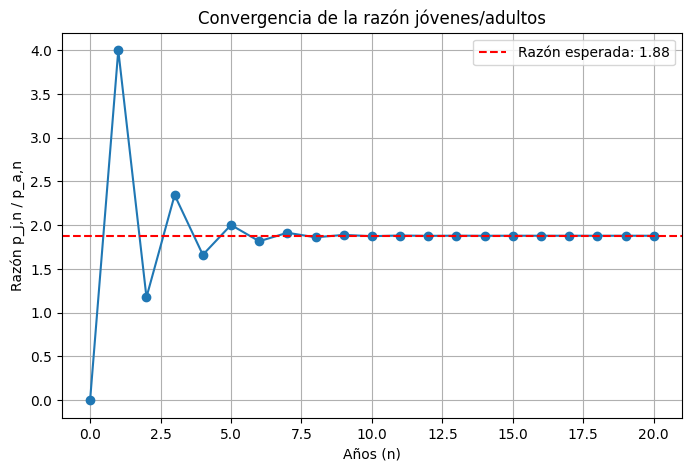

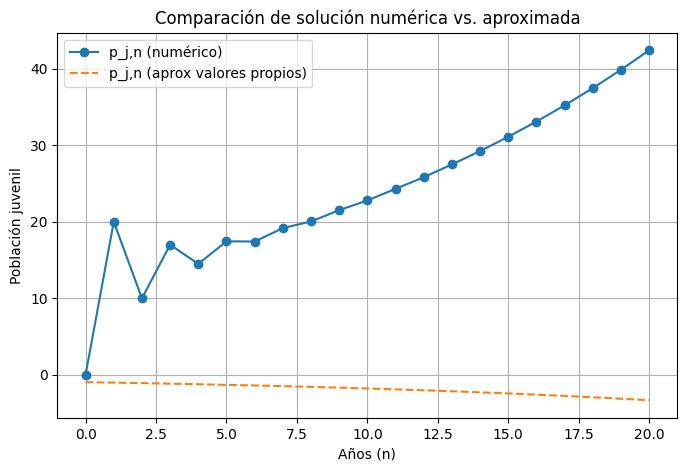

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#Def A y la p0
A = np.array([[0, 2],
              [0.3, 0.5]])

p0 = np.array([0, 10])  # No hay jóvenes, solo 10 adultos

# Número de años a calcular
n_max = 20
poblacion = [p0]

#Calcular la evolución de la población usando p_n = A^n * p0
for _ in range(n_max):
    p_n = A @ poblacion[-1]
    poblacion.append(p_n)

poblacion = np.array(poblacion)

#calcular la razón p_j,n / p_a,n y se supone convergencia a 1.88
razon_pjn_pan = poblacion[:, 0] / poblacion[:, 1]  # jóvenes/adultos

plt.figure(figsize=(8, 5))
plt.plot(range(n_max + 1), razon_pjn_pan, marker="o", linestyle="-")
plt.axhline(y=1.88, color="r", linestyle="--", label="Razón esperada: 1.88")
plt.xlabel("Años (n)")
plt.ylabel("Razón p_j,n / p_a,n")
plt.title("Convergencia de la razón jóvenes/adultos")
plt.legend()
plt.grid()
plt.show()

# Aprox. usando valores y vectores propios
eigvals, eigvecs = np.linalg.eig(A)
lambda_1 = max(abs(eigvals))  # Valor propio dominante

#ahpra para grandes n
pn_aprox = (lambda_1 ** np.arange(n_max + 1))[:, np.newaxis] * eigvecs[:, 0]


#grafica!
plt.figure(figsize=(8, 5))
plt.plot(range(n_max + 1), poblacion[:, 0], label="p_j,n (numérico)", marker="o")
plt.plot(range(n_max + 1), pn_aprox[:, 0], "--", label="p_j,n (aprox valores propios)")
plt.xlabel("Años (n)")
plt.ylabel("Población juvenil")
plt.title("Comparación de solución numérica vs. aproximada")
plt.legend()
plt.grid()
plt.show()


##Punto 5: Sistemas de ecuaciones
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

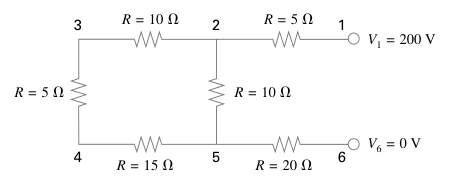

In [7]:
import numpy as np

# Definir la matriz de coeficientes (según las ecuaciones de Kirchhoff)
A = np.array([
    [1/5 + 1/10, -1/10, 0, 0, 0, 0],
    [-1/10, 1/10 + 1/5 + 1/10, -1/10, 0, 0, 0],
    [0, -1/10, 1/10 + 1/10 + 1/5, -1/5, 0, 0],
    [0, 0, -1/5, 1/5 + 1/15 + 1/10, -1/10, 0],
    [0, 0, 0, -1/10, 1/10 + 1/20 + 1/10, -1/20],
    [0, 0, 0, 0, -1/20, 1/20]
])

# Definir el vector de términos independientes (voltajes dados)
b = np.array([200/5, 0, 0, 0, 0, 0])

corrientes = np.linalg.solve(A, b)
corrientes


array([146.7961165 ,  40.38834951,  14.75728155,   9.32038835,
         4.66019417,   4.66019417])

In [8]:
import numpy as np

def resolver_circuito():
    # Definir la matriz de coeficientes basada en las leyes de Kirchhoff
    A = np.array([
        [1/5 + 1/10, -1/10, 0, 0, 0, 0],
        [-1/10, 1/10 + 1/5 + 1/10, -1/10, 0, 0, 0],
        [0, -1/10, 1/10 + 1/10 + 1/5, -1/5, 0, 0],
        [0, 0, -1/5, 1/5 + 1/15 + 1/10, -1/10, 0],
        [0, 0, 0, -1/10, 1/10 + 1/20 + 1/10, -1/20],
        [0, 0, 0, 0, -1/20, 1/20]
    ])

    # Definir el vector de términos independientes (voltajes dados)
    b = np.array([200/5, 0, 0, 0, 0, 0])

    # Resolver el sistema de ecuaciones
    corrientes = np.linalg.solve(A, b)

    # Mostrar los resultados
    for i, corriente in enumerate(corrientes, start=1):
        print(f"i_{i} = {corriente:.4f} A")

if __name__ == "__main__":
    resolver_circuito()


i_1 = 146.7961 A
i_2 = 40.3883 A
i_3 = 14.7573 A
i_4 = 9.3204 A
i_5 = 4.6602 A
i_6 = 4.6602 A
